In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import time

In [4]:
data=pd.read_csv('Attrition_LDA_HR.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Text(0.5, 1.0, 'Distribution of Age of employees')

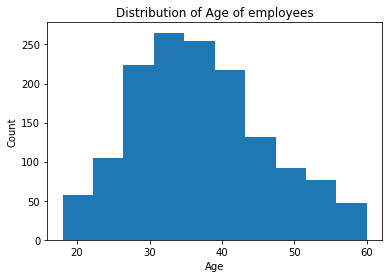

In [8]:
plt.hist(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age of employees')

Normally distributed with mean at around 37 years.

In [30]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


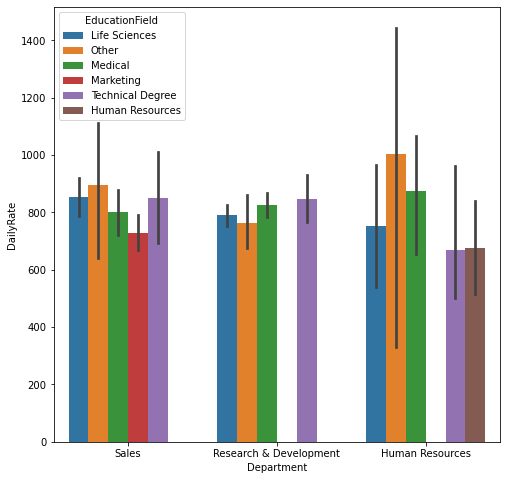

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Department'],y=data['DailyRate'],hue=data['EducationField'])
plt.show()

Human resources have fairly high Daily Rate in some education fields

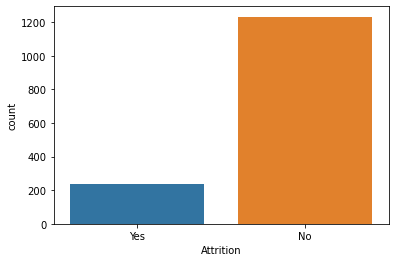

In [44]:
sns.countplot(data['Attrition'])
plt.show()

Data is not imbalanced

## Feature Engineering

In [45]:
BusinessTravel = pd.get_dummies(data['BusinessTravel'],drop_first=True)

In [46]:
Department = pd.get_dummies(data['Department'],drop_first=True)

In [47]:
EducationField = pd.get_dummies(data['EducationField'],drop_first=True)

In [48]:
Gender = pd.get_dummies(data['Gender'],drop_first=True)

In [49]:
JobRole  = pd.get_dummies(data['JobRole'],drop_first=True)

In [50]:
MaritalStatus = pd.get_dummies(data['MaritalStatus'],drop_first=True)

In [51]:
Train = data

In [52]:
def StrToBin(a):
    if a == 'Yes':
        return 1
    else:
        return 0
    
def StrToBinb(a):
    if a == 'Y':
        return 1
    else:
        return 0
    

In [53]:
Train['Attrition']=Train['Attrition'].apply(StrToBin)

In [54]:
Train['OverTime']=Train['OverTime'].apply(StrToBin)

In [55]:
Train['Over18']=Train['Over18'].apply(StrToBinb)

In [56]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [57]:
Train.drop(['Department','EducationField','EmployeeNumber','Gender','BusinessTravel','JobRole','MaritalStatus','JobLevel'],axis=1,inplace=True)

In [58]:
Train = pd.concat([Train,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus],axis=1)

In [59]:
Train.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Research & Development', 'Sales', 'Life Sciences', 'Marketing',
       'Medical', 'Other', 'Technical Degree', 'Male', 'Travel_Frequently',
       'Travel_Rarely', 'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Married', 'Single'],
      dtype='object')

In [60]:
y = Train['Attrition']

In [62]:
X = Train.drop(['Attrition'], axis=1)

## Train-Test split and scaling

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Modelling and Prediction

### Using Logistics Regression only as model for prediction

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.24600458145141602


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [66]:
y_pred = fit1.predict(X_test_sc)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

[[362   9]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       371
           1       0.78      0.44      0.56        70

    accuracy                           0.89       441
   macro avg       0.84      0.71      0.75       441
weighted avg       0.88      0.89      0.88       441



### Using LDA only as the model for prediction

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [69]:
lda_0 = LDA()
lda_0.fit(X_train_sc, y_train)
y_test_pred_0 = lda_0.predict(X_test_sc)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm_0 = confusion_matrix(y_test, y_test_pred_0)
cr_0 = classification_report(y_test, y_test_pred_0)
print(cm_0)
print(cr_0)

[[359  12]
 [ 38  32]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.46      0.56        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.75       441
weighted avg       0.88      0.89      0.88       441



### Using LDA for dimensionality reduction and Logistics Regression for prediction

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [72]:
lda = LDA(n_components = 1)
X_train_1 = lda.fit_transform(X_train_sc, y_train)
X_test_1 = lda.transform(X_test_sc)

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1) #euc method
start_time = time.time()
fit1 = classifier.fit(X_train_1, y_train)
end_time = time.time()
time3 = end_time-start_time
print(time3)

0.007004737854003906


In [77]:
time2/time3

35.119741320626275

Significant reduction in time after dimensionality reduction

In [74]:
y_pred = fit1.predict(X_test_1)

In [78]:
from sklearn.metrics import confusion_matrix,classification_report
cm_1 = confusion_matrix(y_test, y_pred)
cr_1 = classification_report(y_test, y_pred)
print(cm_1)
print(cr_1)

[[359  12]
 [ 38  32]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.46      0.56        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.75       441
weighted avg       0.88      0.89      0.88       441



### Applying KNN, SVM and Decision Tree and comparing using accuracy score

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#will the split 80-20 or 70-30 change my F1 score? - Insignificant

In [86]:
lda = LDA(n_components = 1,solver='eigen',shrinkage='auto')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### Using LDA and KNN 

In [87]:
#finding best value of k
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

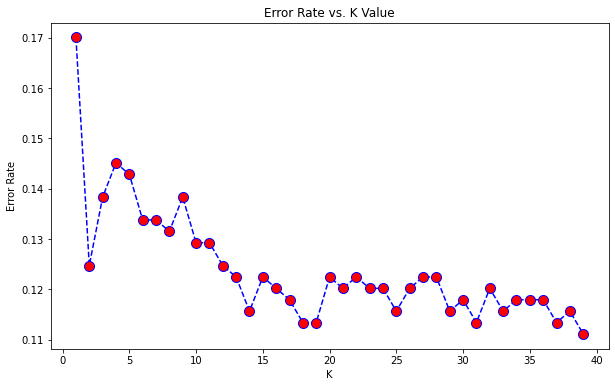

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='brute')
knn.fit(X_train_1,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=11, weights='distance')

In [81]:
pred = knn.predict(X_test_1)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[352  19]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       371
           1       0.61      0.43      0.50        70

    accuracy                           0.87       441
   macro avg       0.76      0.69      0.71       441
weighted avg       0.85      0.87      0.86       441



Using LDA and SVM

In [89]:
from sklearn.svm import SVC
model = SVC(C=100,kernel = 'rbf')
model.fit(X_train,y_train)

SVC(C=100)

In [90]:
predictions = model.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[360  11]
 [ 42  28]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.72      0.40      0.51        70

    accuracy                           0.88       441
   macro avg       0.81      0.69      0.72       441
weighted avg       0.87      0.88      0.87       441



### LDA + Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [93]:
dt = DTC(criterion='entropy',splitter='random')

In [94]:
tree = dt.fit(X_train,y_train)

In [95]:
pred_t = dt.predict(X_test)

In [96]:
cm = confusion_matrix(y_test,pred_t)
cr = classification_report(y_test,pred_t)
print(cm)
print(cr)

[[339  32]
 [ 36  34]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       371
           1       0.52      0.49      0.50        70

    accuracy                           0.85       441
   macro avg       0.71      0.70      0.70       441
weighted avg       0.84      0.85      0.84       441

